Training Model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('final_dataset.csv')

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [5]:
df.shape

(10000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
 10  operational_hours        10000 non-null  int64  
 11  RUL                      10000 non-null  float64
 12  Vibration (mm/s)         10000 non-null  float64
 13  Pressure (Pa)            10000 non-null  float64
 14  Maintenance Required   

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Air temperature [K],10000.0,300.004930,2.000259,295.300000,298.300000,300.100000,301.500000,304.500000
Process temperature [K],10000.0,310.005560,1.483734,305.700000,308.800000,310.100000,311.100000,313.800000
Rotational speed [rpm],10000.0,1538.776100,179.284096,1168.000000,1423.000000,1503.000000,1612.000000,2886.000000
Torque [Nm],10000.0,39.986910,9.968934,3.800000,33.200000,40.100000,46.800000,76.600000
Tool wear [min],10000.0,107.951000,63.654147,0.000000,53.000000,108.000000,162.000000,253.000000
Target,10000.0,0.033900,0.180981,0.000000,0.000000,0.000000,0.000000,1.000000
operational_hours,10000.0,2599.831500,1434.530378,111.000000,1335.000000,2545.000000,3909.000000,4995.000000
RUL,10000.0,2359.175195,1434.573018,-43.059499,1040.807703,2437.613362,3612.921791,4869.004338
Vibration (mm/s),10000.0,0.002787,0.997068,-1.732027,-0.864390,0.013734,0.862230,1.731966


In [8]:
df.describe(include= 'object')

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


In [9]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
operational_hours          0
RUL                        0
Vibration (mm/s)           0
Pressure (Pa)              0
Maintenance Required       0
Temp_Change                0
Vib_Change                 0
Temperature_Mean           0
Vibration_Mean             0
Pressure_Mean              0
RPM_Mean                   0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Filtering Categorical Calumns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [12]:
# Print Categorical Columns
cat_cols

['Product ID', 'Type', 'Failure Type']

In [13]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())

Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
L50513    1
L50514    1
L50515    1
L50516    1
L57179    1
Name: count, Length: 10000, dtype: int64
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [14]:
df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

In [15]:
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)

In [16]:
df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [17]:
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)

In [18]:
# Shape Check
df.shape

(9973, 21)

In [19]:
num_cols= df.select_dtypes(exclude='O').columns.tolist()
num_cols

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'operational_hours',
 'RUL',
 'Vibration (mm/s)',
 'Pressure (Pa)',
 'Maintenance Required',
 'Temp_Change',
 'Vib_Change',
 'Temperature_Mean',
 'Vibration_Mean',
 'Pressure_Mean',
 'RPM_Mean']

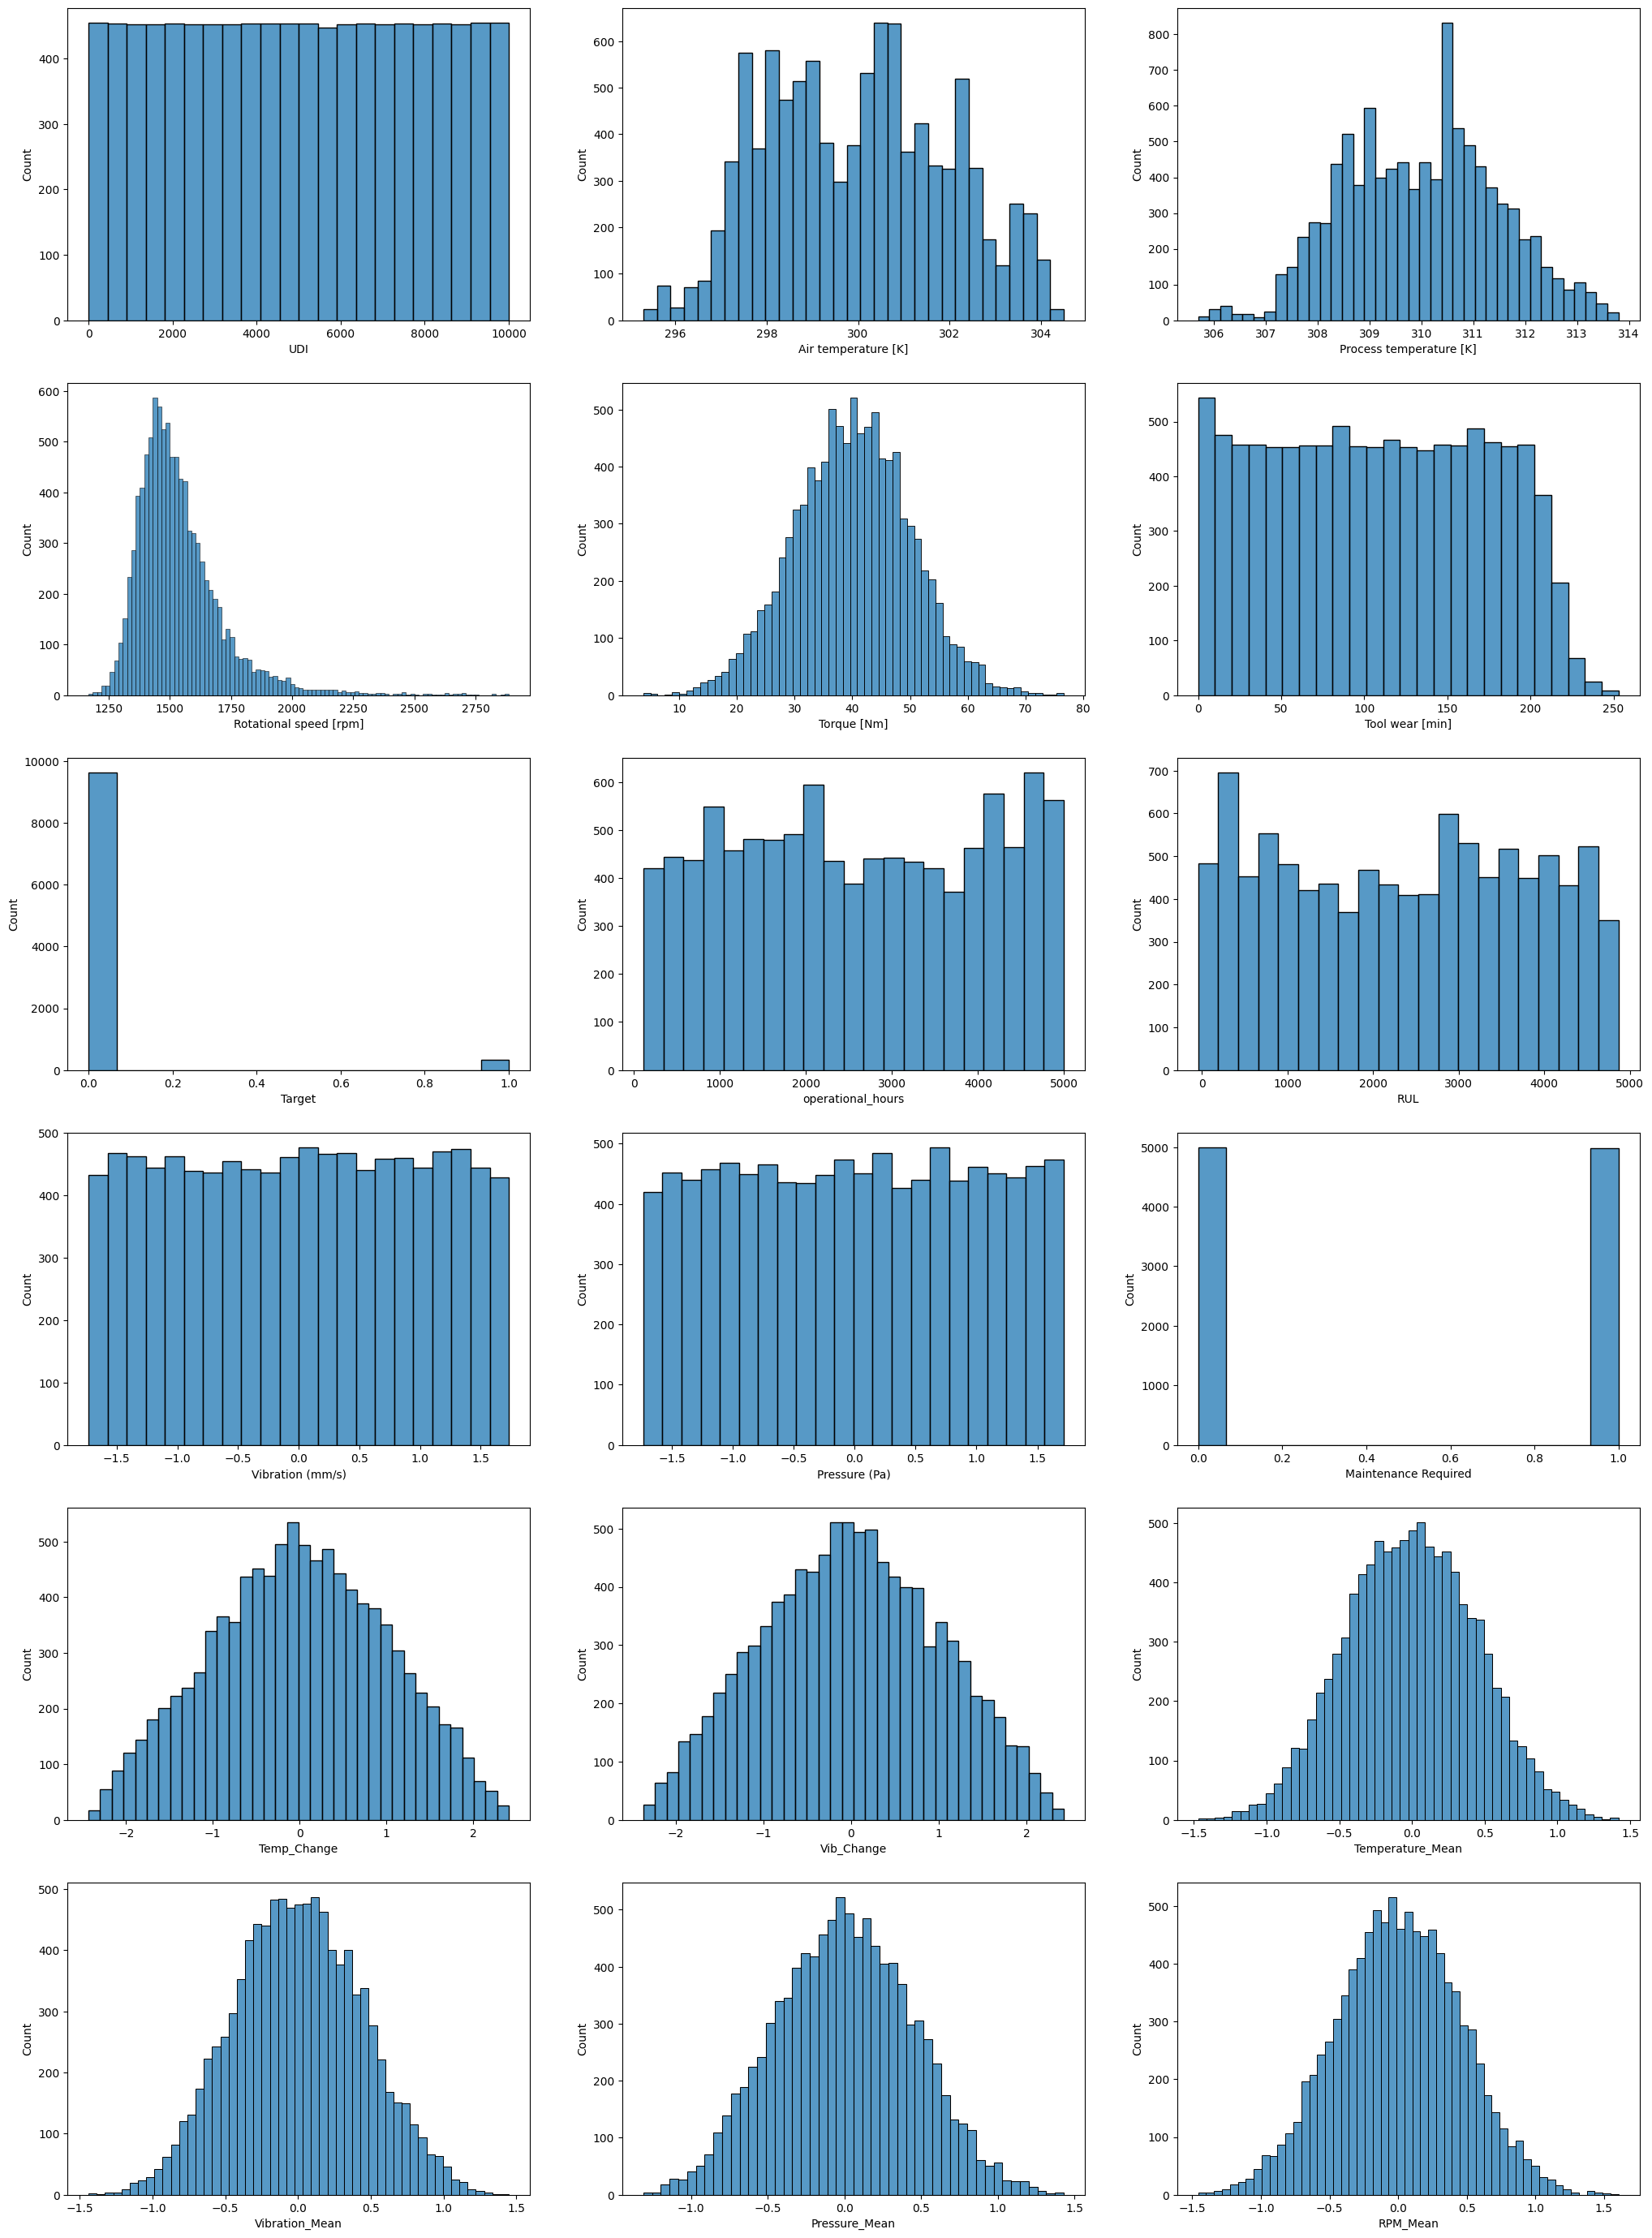

In [27]:
# Pair Plot
plt.figure(figsize= (25,35))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(6,3,i)
    sns.histplot(data= df, x= col)
plt.show()

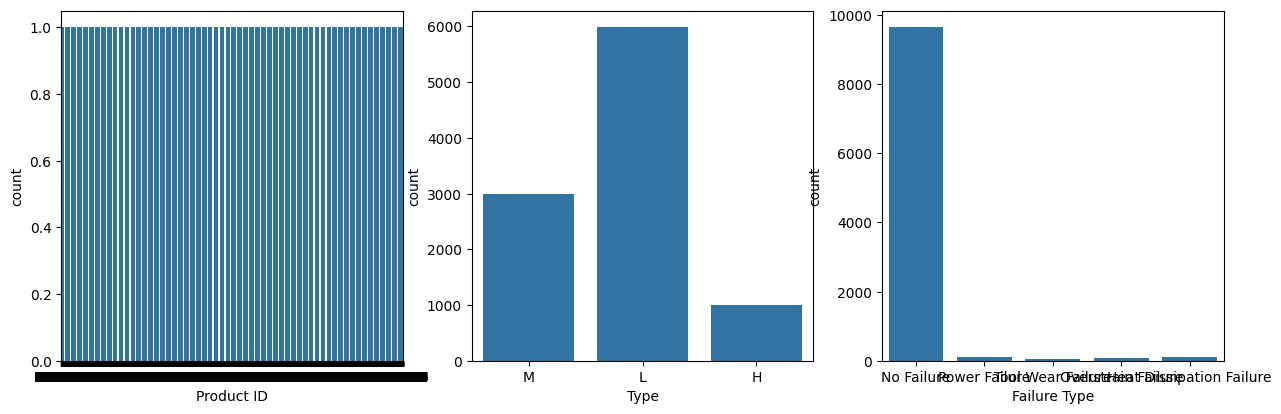

In [28]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(data= df, x= col)
plt.show()